# **Practica 5:** Generate CMB power spectrum

### *Métodos Estadísticos y Numéricos en Cosmología*

#### *Hugo Rivera Morales*

In [1]:
# Paqueterias
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model, initialpower
import scipy as sp
from scipy import special

## 1 Use spherical Harmonics to generate a realistic CMB realisation

#### 1. Use cosmology 1 of the first exercise and get the $\langle TT \rangle$ power spectrum $C_\ell$

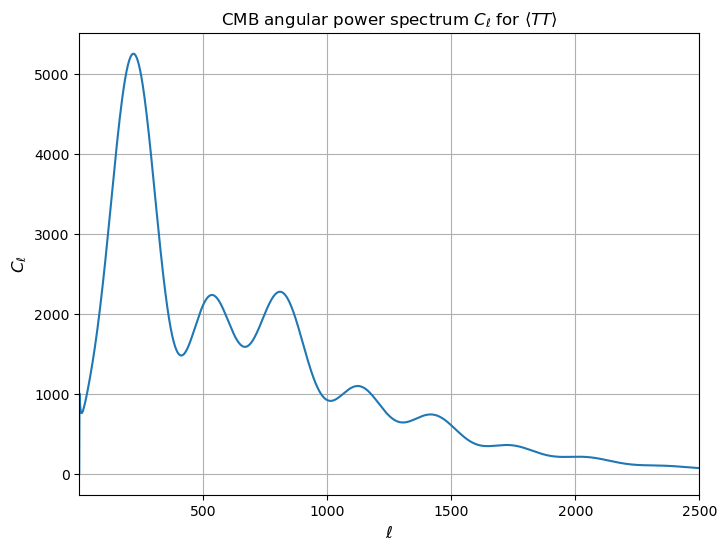

In [2]:
# Defining cosmology
Omega_c = 0.25
Omega_b = 0.05
H0 = 70 # km/s/Mpc
h = H0/100

# CMB's power spectrum using camb 
# Setting the CAMB parameters
params = camb.CAMBparams()
params.set_cosmology(H0=70.0, ombh2=Omega_b*h**2, omch2=Omega_c*h**2, omk=0)
params.InitPower.set_params(As=2e-9, ns=0.965, r=0)
params.set_for_lmax(2550, lens_potential_accuracy=0)
# Calculating the results for this set of parameters
results = camb.get_results(params)
# Getting dictionary of CAMB power spectrum
power_cmb = results.get_cmb_power_spectra(params, CMB_unit='muK')
# Defining the total power spectrum
totCl = power_cmb['total']
# The first entrances [:,0] in the second dimension stands for the TT case
Cl_arr = totCl[:,0]
l_arr = np.arange(totCl.shape[0]) 

# Power spectrum plot
plt.figure(figsize=(8, 6))
plt.plot(l_arr, Cl_arr)
plt.title(r'CMB angular power spectrum $C_{\ell}$ for $\langle TT \rangle$')
plt.xlabel(r'$\ell$', fontsize = 12)
plt.ylabel(r'$C_\ell$', fontsize = 12)
plt.xlim(2,2500)
plt.grid() 

#### 2. Using the $C_\ell$ information for the modes between $\ell = 1$ and $\ell = 20$ generate gaussian random values for the $a_{l,m}$

The information from the modes between $\ell \in [0,20]$ to generate the gaussian random values are given by:

In [3]:
Cl_20 = totCl[1:21,0]

To obtain the $a_{l,m}$ values we need to write the spherical harmonic decomposition as:

\begin{equation}
\delta(\theta, \phi) = \sum_{\ell = 0}^{\infty}\sum_{m = -\ell}^{\ell}a_{\ell m}Y_{\ell m}(\theta,\phi)
\end{equation}

where, the $Y_{\ell m}(\theta,\phi)$ is a complete orthonormal base that satisfies:

$$\int d\Omega Y_{\ell m}(\theta, \phi)Y^{*}_{\ell' m'}(\theta, \phi) = \delta_{\ell \ell'}\delta_{m m'}$$ 

And the conditions $\langle a_{\ell m} \rangle = 0$ and $\langle a_{\ell m}a^{*}_{\ell' m'} \rangle = \delta_{\ell \ell'}\delta_{m m'}C(\ell)$.

So there are $2\ell+1$ values of $m$ for every $\ell$, so a total of 3 + 5 + 7 + ... + 41 = 440.

#### 3. Create two arrays corresponding to $\theta \in [0, 2\pi]$ and $\phi \in [0, 2\pi]$ with 300 bins of values

In [4]:
# Creating the corresponding θ and φ
bins = 300
theta = np.linspace(0,2*np.pi,bins)
phi = np.linspace(0,np.pi,bins)

#### 4. Create the 2D_arrays of $\theta$ and $\phi$ values using the function np.meshgrid

In [5]:
# Creating 2D_arr of θ and φ values using np.meshgrid
theta_2D, phi_2D = np.meshgrid(theta,phi)
# We will use the power spectrum Cl as the variance (sigma) the sqrt. of the standar desviation (sigma**2)
sigma_alm = np.sqrt(Cl_20)

#### 5. Generate the map of temperature using the values of the $a_{l,m}$ you get with the spherical harmonics provided by: sp.special.sph_harm(m,l,theta_2D, phi_2D) taking only the real part of the result

In [6]:
# Generating the map of temperature using the values of the al,m you get with the spherical harmonics provided by sp.special.sph_harm...
delta = np.zeros((bins,bins), dtype = complex)
for l in range(1,21): # 1-20 pero python no toma el ultimo numero
    for m in range(-l,l+1):
        a_lm = sigma_alm[l-1]*np.random.randn(1) # <a_lm> = 0
        delta += a_lm*sp.special.sph_harm(m,l,theta_2D,phi_2D)
delta = delta.real

#### 6. Plot the map of temperature you obtain

Text(0, 0.5, 'y-axis')

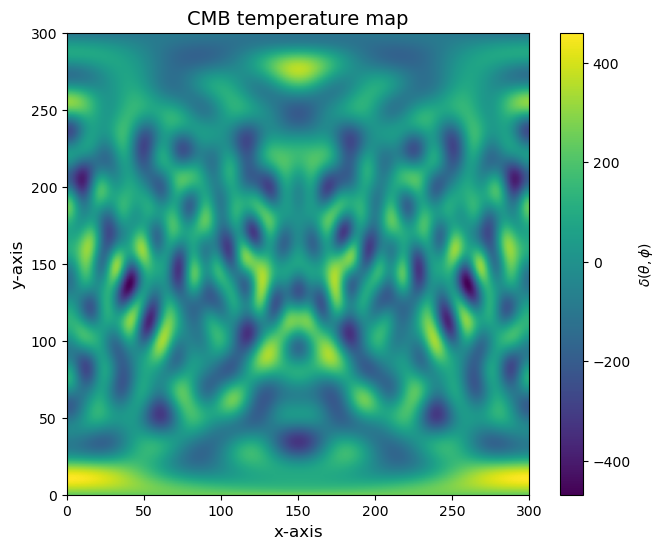

In [7]:
# Plot of the temp. map (taking only the real part of the result)
plt.figure(figsize=(8, 6))
plt.imshow(delta.real, cmap='viridis', origin='lower', extent=(0, bins, 0, bins))
plt.colorbar(label='$\\delta(\\theta,\\phi)$')
plt.title(r'CMB temperature map', fontsize = 14)
plt.xlabel(r'x-axis', fontsize = 12)
plt.ylabel(r'y-axis', fontsize = 12)

#### BONUS : You probably see that the plot you obtain is deformed. That is due to the projection effect because the $\theta$ and $\phi$ values correspond to a spherical projection rather than a plane. So, you can try to generate a 3D plot on a sphere using the following:

**from matplotlib import cm, colors**\
**from mpl_toolkits.mplot3d import Axes3D**

fig = plt.figure(figsize=(18,18))\
fmax, fmin = map.max(), map.min()\
fcolors = (mapR - fmin)/(fmax - fmin)\
ax = fig.add_subplot(111, projection=’3d’)\
x = np.sin(phi_2D) * np.cos(theta_2D)\
y = np.sin(phi_2D) * np.sin(theta_2D)\
z = np.cos(phi_2D)\
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.jet(fcolors))\
ax.set_axis_off()\
plt.show()

where map is the temperature map (real values) you just obtain before. You can recognize that x, y and z are the spherical coordinates for a unity sphere.

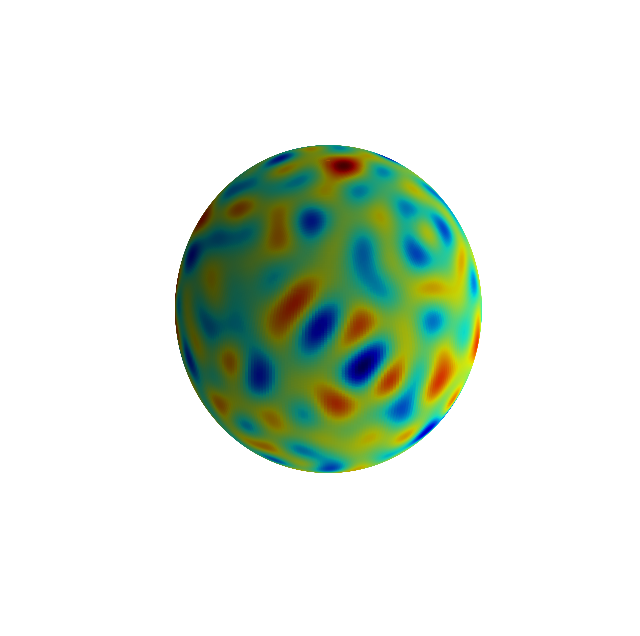

In [8]:
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
fmax, fmin = delta.max(), delta.min()
fcolors = (delta - fmin)/(fmax - fmin)
ax = fig.add_subplot(111, projection='3d')
x = np.sin(phi_2D)*np.cos(theta_2D)
y = np.sin(phi_2D)*np.sin(theta_2D)
z = np.cos(phi_2D)
ax.plot_surface(x,y,z, rstride=1, cstride=1, facecolors=cm.jet(fcolors))
ax.set_axis_off()
plt.show()